#  02_LimpiezaEDA.ipynb – Limpieza, transformación y análisis exploratorio

---

##  Objetivo de este notebook

En este notebook se realizará:

- La limpieza del dataset procesado en el paso anterior
- Transformaciones básicas (cambios de tipo, eliminación de columnas)
- Codificación de variables categóricas
- Conversión de moneda (`INR` a `EUR`)
- Generación de nuevas variables (feature engineering)
- Análisis exploratorio con visualizaciones

---

##  Carga del dataset

Se carga la versión sin modificar guardada en `data/processed/dataset_v1.csv`.

---

##  Limpieza de datos

- Se eliminan columnas innecesarias (`Unnamed: 0`, `flight`, `route`, etc.)
- Se corrigen los tipos de datos
- Se eliminan o imputan valores nulos
- Se detectan y eliminan posibles duplicados

---

##  Conversión de precios a euros

- Se convierte la variable `price` a euros (`price_eur`) usando un tipo de cambio aproximado.
- Se redondea a 2 decimales.

---

##  Codificación de variables categóricas

- Se codifica la columna `stops` como ordinal: `zero < one < two_or_more`.
- En pasos posteriores se codificarán otras variables (`airline`, `source_city`, `class`, etc.).

---

##  Feature Engineering

- Se revisan y crean nuevas variables útiles para el modelo.
  - Ejemplo: `days_left`, `duration_mins`, `is_weekend_flight`, etc.

---

##  Análisis Exploratorio de Datos (EDA)

- Se generan visualizaciones para entender la distribución de variables clave
- Se explora la relación entre las variables predict

In [15]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Codificación
from sklearn.preprocessing import OrdinalEncoder

In [16]:
df = pd.read_csv("C:/Users/Poltatil/Repo_thebridge/2506_dsft_thebridge/proyecto_final_precio_vuelos/data/raw/Clean_Dataset.csv")

In [17]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [18]:
# Conversión de moneda
exchange_rate_inr_to_eur = 0.009896

# Convertir columna de precios
df['price_eur'] = df['price'] * exchange_rate_inr_to_eur

# Redondear a 2 decimales
df['price_eur'] = df['price_eur'].round(2)

In [19]:
df.drop(columns=['price'], inplace=True)


In [20]:
# Definir orden lógico para los momentos del día
departure_map = {
    'Early_Morning': 6,
    'Morning': 9,
    'Afternoon': 14,
    'Evening': 18,
    'Night': 22,
    'Late_Night': 1
}

df['departure_hour'] = df['departure_time'].map(departure_map)

In [21]:
df.drop(columns=['departure_time'], inplace=True)


In [22]:
# Eliminar columna innecesaria

df.drop(columns='Unnamed: 0', inplace=True)


In [23]:
# Revisar valores únicos de 'stops'
df['stops'].value_counts()


stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import OrdinalEncoder

ord_encoder = OrdinalEncoder(categories=[['zero', 'one', 'two_or_more']])
df['stops'] = ord_encoder.fit_transform(df[['stops']])
df['stops'] = df['stops'].astype(int)

# Confirmar codificación
df['stops'].value_counts()

stops
1    250863
0     36004
2     13286
Name: count, dtype: int64

In [25]:
# Conversión de tipos
df['days_left'] = df['days_left'].astype(float)
df['stops'] = df['stops'].astype(float)
df['price_eur'] = df['price_eur'].astype(float)

In [26]:
df

,airline,flight,source_city,stops,arrival_time,destination_city,class,duration,days_left,price_eur,departure_hour
0,SpiceJet,SG-8709,Delhi,0.0,Night,Mumbai,Economy,2.17,1.0,58.91,18
1,SpiceJet,SG-8157,Delhi,0.0,Morning,Mumbai,Economy,2.33,1.0,58.91,6
2,AirAsia,I5-764,Delhi,0.0,Early_Morning,Mumbai,Economy,2.17,1.0,58.94,6
3,Vistara,UK-995,Delhi,0.0,Afternoon,Mumbai,Economy,2.25,1.0,58.93,9
4,Vistara,UK-963,Delhi,0.0,Morning,Mumbai,Economy,2.33,1.0,58.93,9
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,1.0,Evening,Hyderabad,Business,10.08,49.0,685.45,9
300149,Vistara,UK-826,Chennai,1.0,Night,Hyderabad,Business,10.42,49.0,763.03,14
300150,Vistara,UK-832,Chennai,1.0,Night,Hyderabad,Business,13.83,49.0,782.76,6
300151,Vistara,UK-828,Chennai,1.0,Evening,Hyderabad,Business,10.00,49.0,807.37,6


In [27]:
df['stops'] = df['stops'].astype(int)


In [28]:
df

,airline,flight,source_city,stops,arrival_time,destination_city,class,duration,days_left,price_eur,departure_hour
0,SpiceJet,SG-8709,Delhi,0,Night,Mumbai,Economy,2.17,1.0,58.91,18
1,SpiceJet,SG-8157,Delhi,0,Morning,Mumbai,Economy,2.33,1.0,58.91,6
2,AirAsia,I5-764,Delhi,0,Early_Morning,Mumbai,Economy,2.17,1.0,58.94,6
3,Vistara,UK-995,Delhi,0,Afternoon,Mumbai,Economy,2.25,1.0,58.93,9
4,Vistara,UK-963,Delhi,0,Morning,Mumbai,Economy,2.33,1.0,58.93,9
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,1,Evening,Hyderabad,Business,10.08,49.0,685.45,9
300149,Vistara,UK-826,Chennai,1,Night,Hyderabad,Business,10.42,49.0,763.03,14
300150,Vistara,UK-832,Chennai,1,Night,Hyderabad,Business,13.83,49.0,782.76,6
300151,Vistara,UK-828,Chennai,1,Evening,Hyderabad,Business,10.00,49.0,807.37,6


In [29]:
# One-hot encoding para la columna 'class'


df = pd.get_dummies(df, columns=['class'], drop_first=True)


In [30]:
# Converitmos Bussines a 1 y Economy a 0

df['class_Economy'] = df['class_Economy'].astype(int)


In [31]:
df

,airline,flight,source_city,stops,arrival_time,destination_city,duration,days_left,price_eur,departure_hour,class_Economy
0,SpiceJet,SG-8709,Delhi,0,Night,Mumbai,2.17,1.0,58.91,18,1
1,SpiceJet,SG-8157,Delhi,0,Morning,Mumbai,2.33,1.0,58.91,6,1
2,AirAsia,I5-764,Delhi,0,Early_Morning,Mumbai,2.17,1.0,58.94,6,1
3,Vistara,UK-995,Delhi,0,Afternoon,Mumbai,2.25,1.0,58.93,9,1
4,Vistara,UK-963,Delhi,0,Morning,Mumbai,2.33,1.0,58.93,9,1
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,1,Evening,Hyderabad,10.08,49.0,685.45,9,0
300149,Vistara,UK-826,Chennai,1,Night,Hyderabad,10.42,49.0,763.03,14,0
300150,Vistara,UK-832,Chennai,1,Night,Hyderabad,13.83,49.0,782.76,6,0
300151,Vistara,UK-828,Chennai,1,Evening,Hyderabad,10.00,49.0,807.37,6,0


In [32]:
df.drop(columns=['flight'], inplace=True)


In [33]:
df

,airline,source_city,stops,arrival_time,destination_city,duration,days_left,price_eur,departure_hour,class_Economy
0,SpiceJet,Delhi,0,Night,Mumbai,2.17,1.0,58.91,18,1
1,SpiceJet,Delhi,0,Morning,Mumbai,2.33,1.0,58.91,6,1
2,AirAsia,Delhi,0,Early_Morning,Mumbai,2.17,1.0,58.94,6,1
3,Vistara,Delhi,0,Afternoon,Mumbai,2.25,1.0,58.93,9,1
4,Vistara,Delhi,0,Morning,Mumbai,2.33,1.0,58.93,9,1
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,1,Evening,Hyderabad,10.08,49.0,685.45,9,0
300149,Vistara,Chennai,1,Night,Hyderabad,10.42,49.0,763.03,14,0
300150,Vistara,Chennai,1,Night,Hyderabad,13.83,49.0,782.76,6,0
300151,Vistara,Chennai,1,Evening,Hyderabad,10.00,49.0,807.37,6,0


In [34]:
df.drop(columns=['arrival_time'], inplace=True)


In [35]:
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [36]:
#Convertir la columna duration a minutos -> duration_mins

df['duration_mins'] = (df['duration'] * 60).astype(int)
df.drop(columns=['duration'], inplace=True)

In [37]:
#Creamos una nueva variable que agrupe los días de antelación

df['days_left_group'] = pd.cut(df['days_left'], bins=[0, 3, 10, 20, 40, df['days_left'].max()],
                               labels=['0-3 días', '4-10 días', '11-20 días', '21-40 días', '40+ días'])


In [62]:
df = df.sample(n=50000, random_state=42).reset_index(drop=True)


In [64]:
df

,airline,source_city,stops,destination_city,days_left,price_eur,departure_hour,class_Economy,duration_mins,days_left_group
0,Air_India,Delhi,1,Kolkata,40.0,72.89,9,1,1185,21-40 días
1,Vistara,Kolkata,1,Mumbai,42.0,641.57,9,0,589,40+ días
2,Vistara,Kolkata,1,Bangalore,41.0,61.31,9,1,630,40+ días
3,Vistara,Chennai,1,Delhi,14.0,595.34,22,0,870,11-20 días
4,Air_India,Bangalore,1,Mumbai,20.0,65.10,14,1,495,11-20 días
...,...,...,...,...,...,...,...,...,...,...
49995,Air_India,Mumbai,1,Delhi,39.0,57.67,14,1,855,21-40 días
49996,GO_FIRST,Delhi,1,Kolkata,13.0,58.92,18,1,960,11-20 días
49997,Vistara,Mumbai,1,Bangalore,41.0,848.52,18,0,979,40+ días
49998,GO_FIRST,Bangalore,1,Kolkata,35.0,78.95,6,1,865,21-40 días


In [42]:
df.drop(columns='class', inplace=True)


KeyError: "['class'] not found in axis"

In [43]:
df

,airline,source_city,stops,destination_city,days_left,price_eur,departure_hour,class_Economy,duration_mins,days_left_group
0,SpiceJet,Delhi,0,Mumbai,1.0,58.91,18,1,130,0-3 días
1,SpiceJet,Delhi,0,Mumbai,1.0,58.91,6,1,139,0-3 días
2,AirAsia,Delhi,0,Mumbai,1.0,58.94,6,1,130,0-3 días
3,Vistara,Delhi,0,Mumbai,1.0,58.93,9,1,135,0-3 días
4,Vistara,Delhi,0,Mumbai,1.0,58.93,9,1,139,0-3 días
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,1,Hyderabad,49.0,685.45,9,0,604,40+ días
300149,Vistara,Chennai,1,Hyderabad,49.0,763.03,14,0,625,40+ días
300150,Vistara,Chennai,1,Hyderabad,49.0,782.76,6,0,829,40+ días
300151,Vistara,Chennai,1,Hyderabad,49.0,807.37,6,0,600,40+ días


In [44]:
df['price_eur'].mean()


np.float64(206.7242229462974)

#  Análisis Exploratorio de Datos (EDA)

Este análisis exploratorio se realiza sobre una muestra de 50.000 vuelos, tras el preprocesamiento. Se exploran variables clave como aerolínea, duración, clase, número de escalas, horas de salida y rutas entre ciudades.


#  Precio medio por aerolínea

c:\Users\Poltatil\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128186 (\N{SEAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


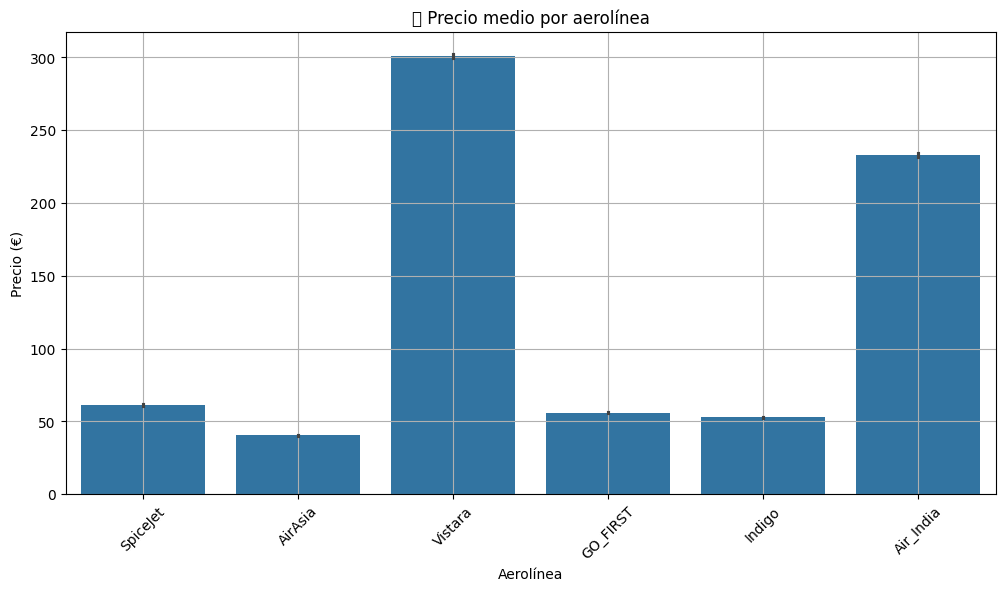

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='airline', y='price_eur', estimator=np.mean)
plt.title('💺 Precio medio por aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Precio (€)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#  Distribución del precio según escalas


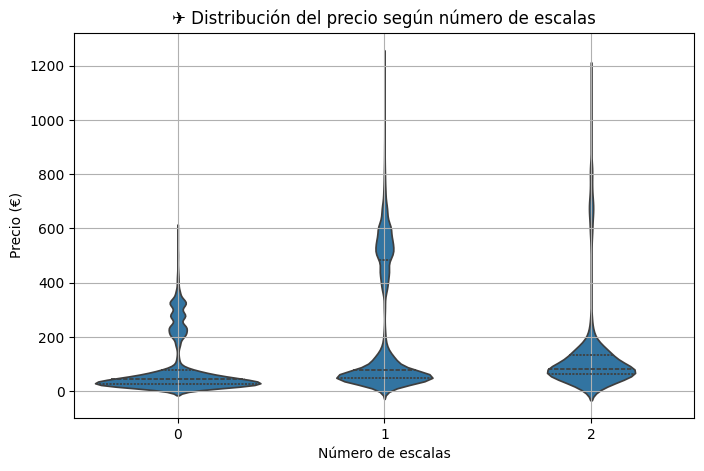

In [46]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='stops', y='price_eur', inner='quartile')
plt.title('✈️ Distribución del precio según número de escalas')
plt.xlabel('Número de escalas')
plt.ylabel('Precio (€)')
plt.grid(True)
plt.show()

#  Relación duración vs precio


c:\Users\Poltatil\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


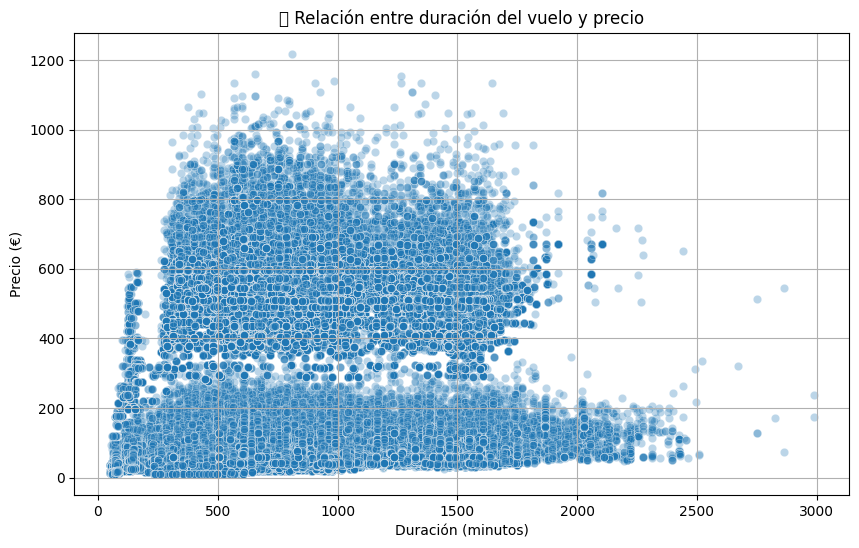

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration_mins', y='price_eur', alpha=0.3)
plt.title('⏱️ Relación entre duración del vuelo y precio')
plt.xlabel('Duración (minutos)')
plt.ylabel('Precio (€)')
plt.grid(True)
plt.show()

#  Precio medio por clase


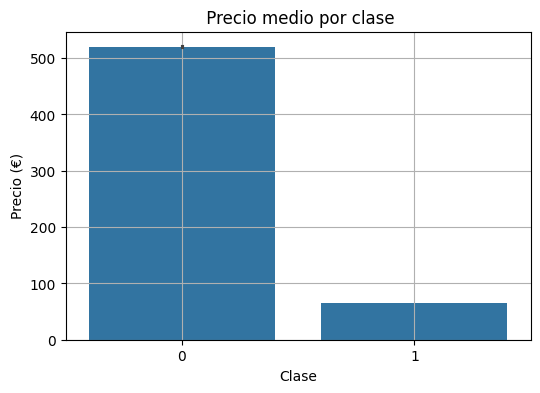

In [49]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='class_Economy', y='price_eur', estimator=np.mean)
plt.title(' Precio medio por clase')
plt.xlabel('Clase')
plt.ylabel('Precio (€)')
plt.grid(True)
plt.show()

In [50]:
df

,airline,source_city,stops,destination_city,days_left,price_eur,departure_hour,class_Economy,duration_mins,days_left_group
0,SpiceJet,Delhi,0,Mumbai,1.0,58.91,18,1,130,0-3 días
1,SpiceJet,Delhi,0,Mumbai,1.0,58.91,6,1,139,0-3 días
2,AirAsia,Delhi,0,Mumbai,1.0,58.94,6,1,130,0-3 días
3,Vistara,Delhi,0,Mumbai,1.0,58.93,9,1,135,0-3 días
4,Vistara,Delhi,0,Mumbai,1.0,58.93,9,1,139,0-3 días
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,1,Hyderabad,49.0,685.45,9,0,604,40+ días
300149,Vistara,Chennai,1,Hyderabad,49.0,763.03,14,0,625,40+ días
300150,Vistara,Chennai,1,Hyderabad,49.0,782.76,6,0,829,40+ días
300151,Vistara,Chennai,1,Hyderabad,49.0,807.37,6,0,600,40+ días


In [51]:
#df_sample.drop(columns='days_left_group', inplace=True)


#  Precio por franja horaria de salida


c:\Users\Poltatil\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128337 (\N{CLOCK FACE TWO OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


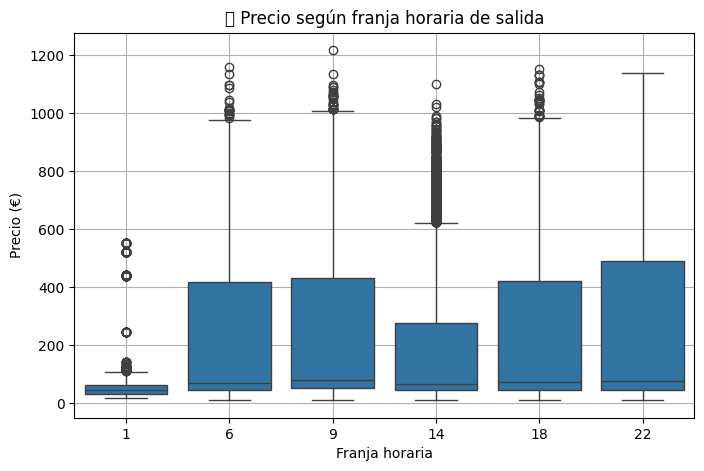

In [52]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='departure_hour', y='price_eur')
plt.title('🕑 Precio según franja horaria de salida')
plt.xlabel('Franja horaria')
plt.ylabel('Precio (€)')
plt.grid(True)
plt.show()

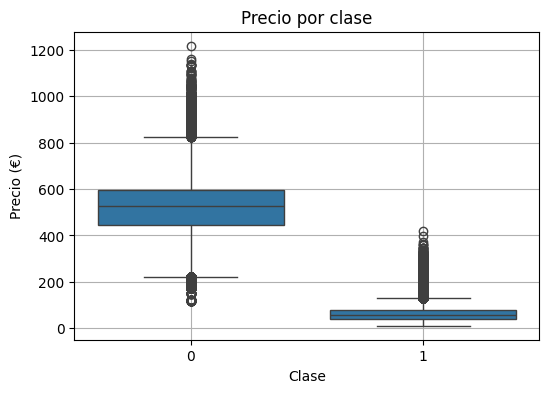

In [55]:
df_sample['class'] = df['class_Economy'].map({1: 'Economy', 0: 'Business'})

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='class_Economy', y='price_eur')
plt.title('Precio por clase')
plt.xlabel('Clase')
plt.ylabel('Precio (€)')
plt.grid(True)
plt.show()


Precio medio por aerolínea

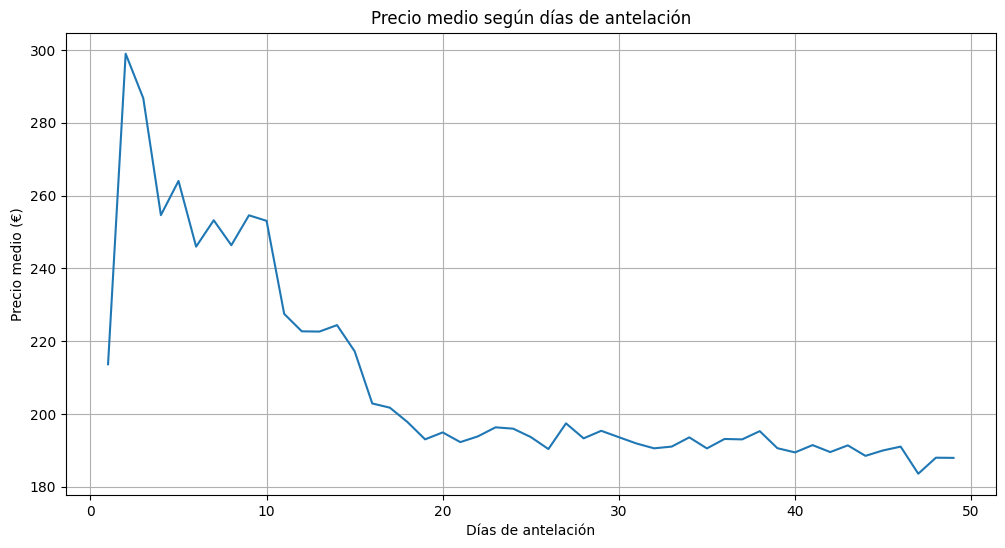

In [56]:
# Agrupar por días de antelación y calcular el precio medio
media_por_dia = df.groupby('days_left')['price_eur'].mean()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=media_por_dia.index, y=media_por_dia.values)
plt.title('Precio medio según días de antelación')
plt.xlabel('Días de antelación')
plt.ylabel('Precio medio (€)')
plt.grid(True)
plt.show()

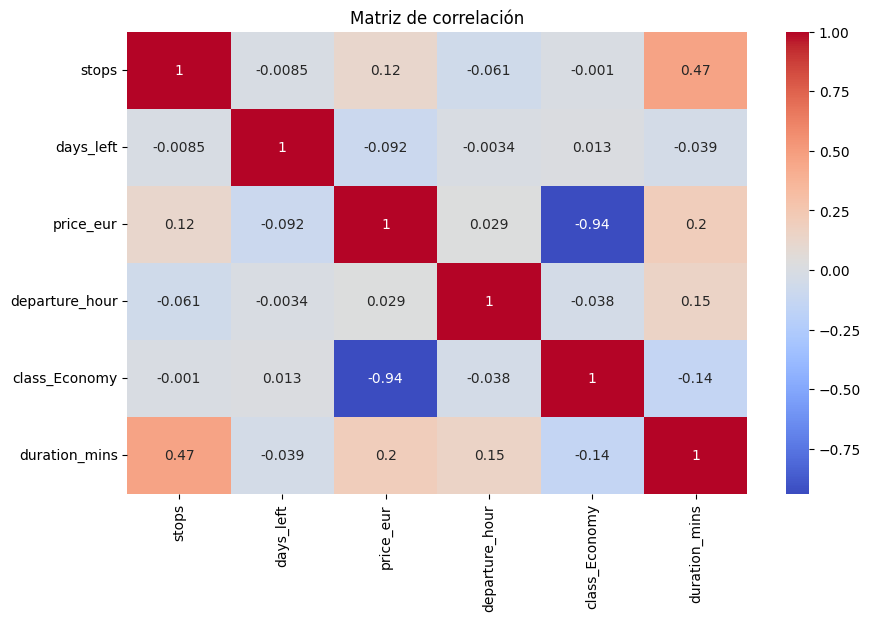

In [57]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

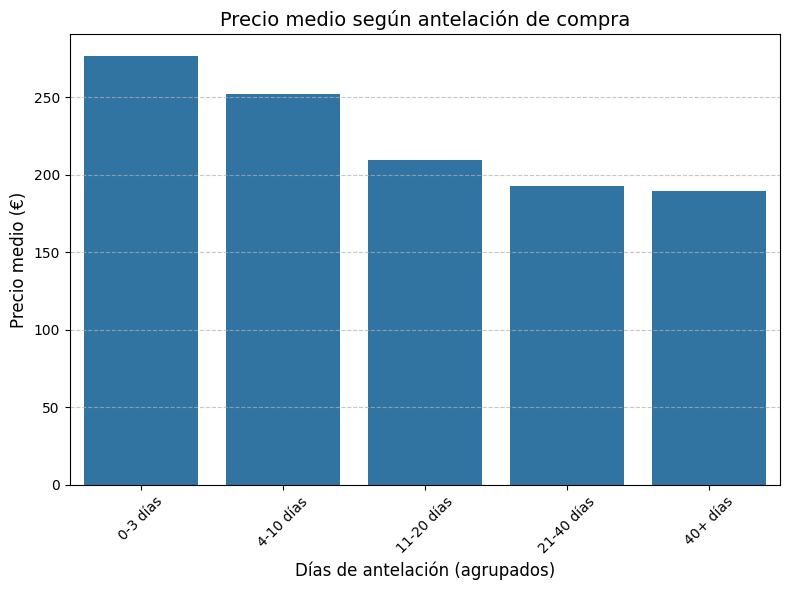

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_sample,
    x='days_left_group',
    y='price_eur',
    estimator='mean',
    errorbar=None
)
plt.title("Precio medio según antelación de compra", fontsize=14)
plt.xlabel("Días de antelación (agrupados)", fontsize=12)
plt.ylabel("Precio medio (€)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Poltatil\AppData\Local\Temp\ipykernel_5392\1756296514.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


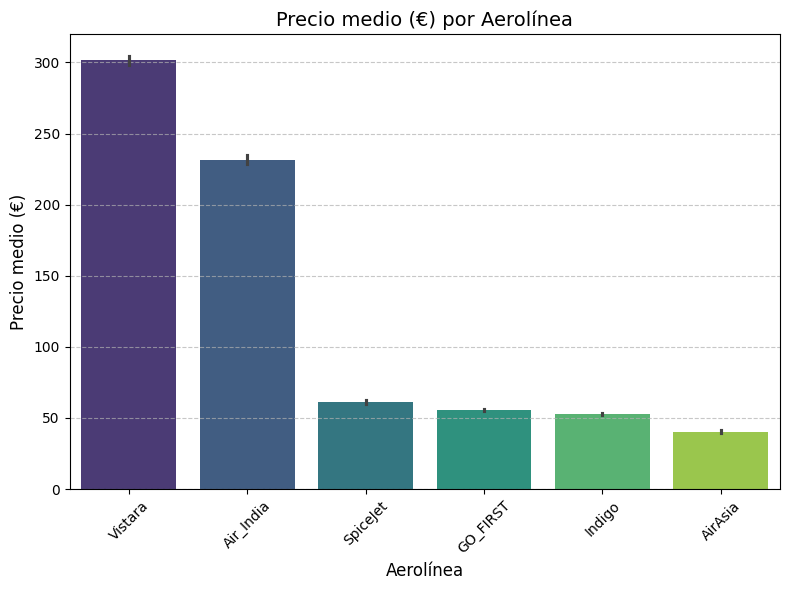

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(
    data=df,
    x='airline',
    y='price_eur',
    estimator='mean',
    order=df.groupby('airline')['price_eur'].mean().sort_values(ascending=False).index,
    palette='viridis'
)
plt.title("Precio medio (€) por Aerolínea", fontsize=14)
plt.xlabel("Aerolínea", fontsize=12)
plt.ylabel("Precio medio (€)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


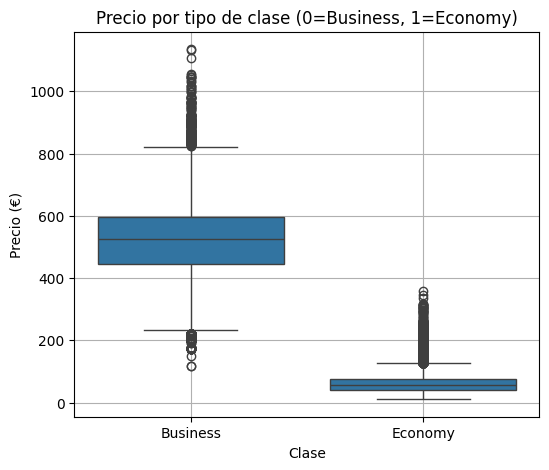

In [67]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='class_Economy', y='price_eur')
plt.title("Precio por tipo de clase (0=Business, 1=Economy)")
plt.xlabel("Clase")
plt.ylabel("Precio (€)")
plt.xticks([0, 1], ["Business", "Economy"])
plt.grid(True)
plt.show()


In [65]:
df.to_csv('../data/processed/df.csv', index=False)


C:\Users\Poltatil\AppData\Local\Temp\ipykernel_5392\2924098197.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='class_Economy', y='price_eur', palette='pastel')


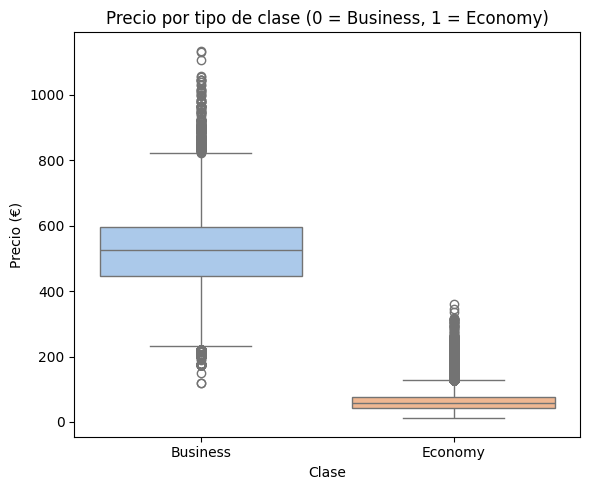

In [69]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='class_Economy', y='price_eur', palette='pastel')
plt.title("Precio por tipo de clase (0 = Business, 1 = Economy)")
plt.xlabel("Clase")
plt.ylabel("Precio (€)")
plt.xticks([0, 1], ["Business", "Economy"])
plt.tight_layout()
plt.show()

C:\Users\Poltatil\AppData\Local\Temp\ipykernel_5392\1283240797.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='days_left_group', y='price_eur', order=order_days, palette='Blues_d')


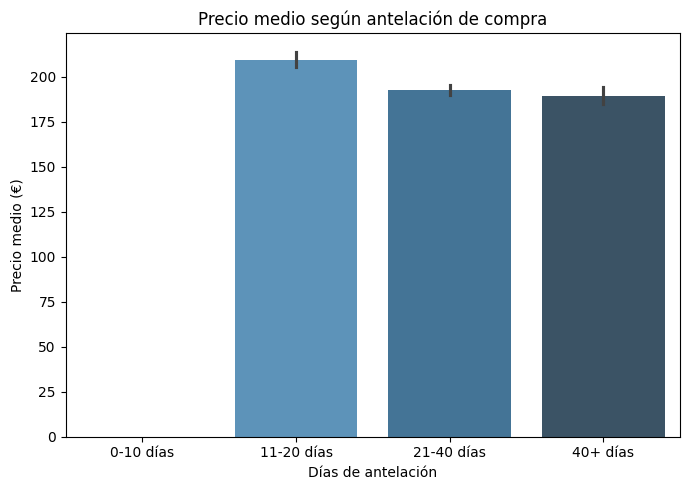

In [ ]:
plt.figure(figsize=(7, 5))
order_days = ["0-10 días", "11-20 días", "21-40 días", "40+ días"]
sns.barplot(data=df, x='days_left_group', y='price_eur', order=order_days, palette='Blues_d')
plt.title("Precio medio según antelación de compra")
plt.xlabel("Días de antelación")
plt.ylabel("Precio medio (€)")
plt.tight_layout()
plt.savefig("docs/02_precio_por_antelacion.png")
plt.show()

In [72]:
df

,airline,source_city,stops,destination_city,days_left,price_eur,departure_hour,class_Economy,duration_mins,days_left_group
0,Air_India,Delhi,1,Kolkata,40.0,72.89,9,1,1185,21-40 días
1,Vistara,Kolkata,1,Mumbai,42.0,641.57,9,0,589,40+ días
2,Vistara,Kolkata,1,Bangalore,41.0,61.31,9,1,630,40+ días
3,Vistara,Chennai,1,Delhi,14.0,595.34,22,0,870,11-20 días
4,Air_India,Bangalore,1,Mumbai,20.0,65.10,14,1,495,11-20 días
...,...,...,...,...,...,...,...,...,...,...
49995,Air_India,Mumbai,1,Delhi,39.0,57.67,14,1,855,21-40 días
49996,GO_FIRST,Delhi,1,Kolkata,13.0,58.92,18,1,960,11-20 días
49997,Vistara,Mumbai,1,Bangalore,41.0,848.52,18,0,979,40+ días
49998,GO_FIRST,Bangalore,1,Kolkata,35.0,78.95,6,1,865,21-40 días


C:\Users\Poltatil\AppData\Local\Temp\ipykernel_5392\1002807364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='destination_city', y='price_eur', order=top_destinos, palette='viridis')


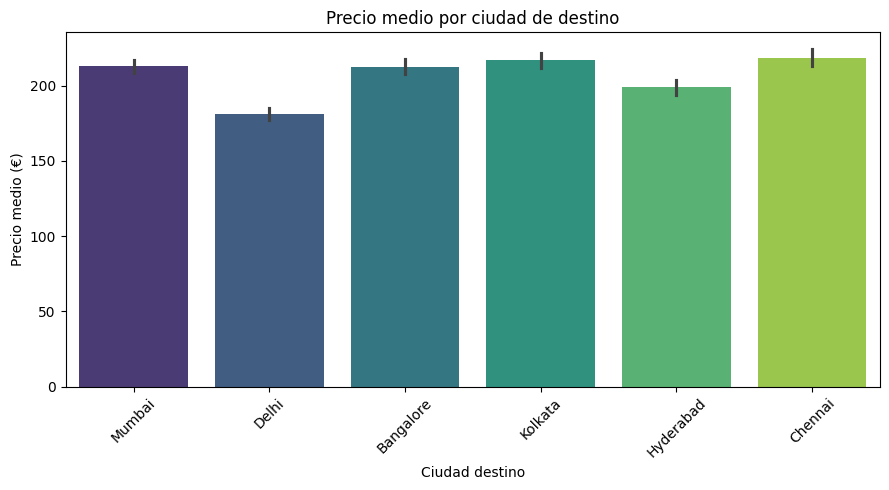

In [74]:
plt.figure(figsize=(9, 5))
top_destinos = df['destination_city'].value_counts().index
sns.barplot(data=df, x='destination_city', y='price_eur', order=top_destinos, palette='viridis')
plt.title("Precio medio por ciudad de destino")
plt.xlabel("Ciudad destino")
plt.ylabel("Precio medio (€)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Poltatil\AppData\Local\Temp\ipykernel_5392\4192567474.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='duration_group', y='price_eur', palette='Set2')


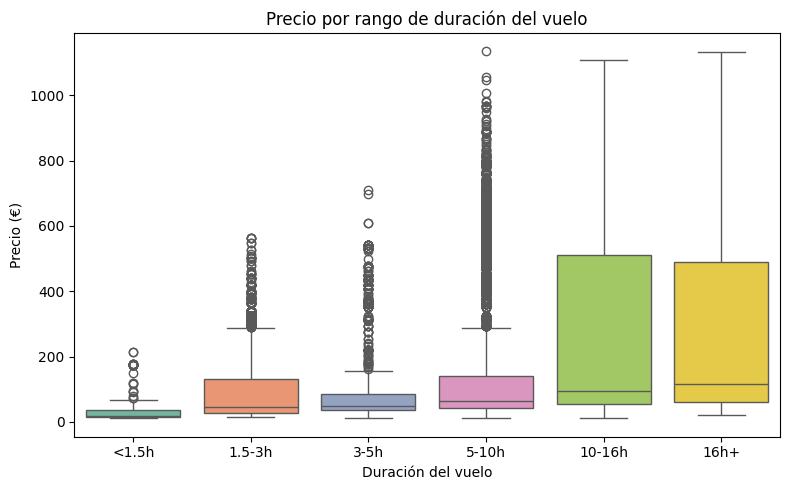

In [77]:
bins = [0, 90, 180, 300, 600, 1000, df['duration_mins'].max()]
labels = ['<1.5h', '1.5-3h', '3-5h', '5-10h', '10-16h', '16h+']
df['duration_group'] = pd.cut(df['duration_mins'], bins=bins, labels=labels, right=False)

# Boxplot de precio por grupo de duración
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='duration_group', y='price_eur', palette='Set2')
plt.title("Precio por rango de duración del vuelo")
plt.xlabel("Duración del vuelo")
plt.ylabel("Precio (€)")
plt.tight_layout()
plt.show()

C:\Users\Poltatil\AppData\Local\Temp\ipykernel_5392\2130066646.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='class_Economy', y='price_eur', showfliers=False, palette='pastel')
C:\Users\Poltatil\AppData\Local\Temp\ipykernel_5392\2130066646.py:7: UserWarning: Glyph 128186 (\N{SEAT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Poltatil\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128186 (\N{SEAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


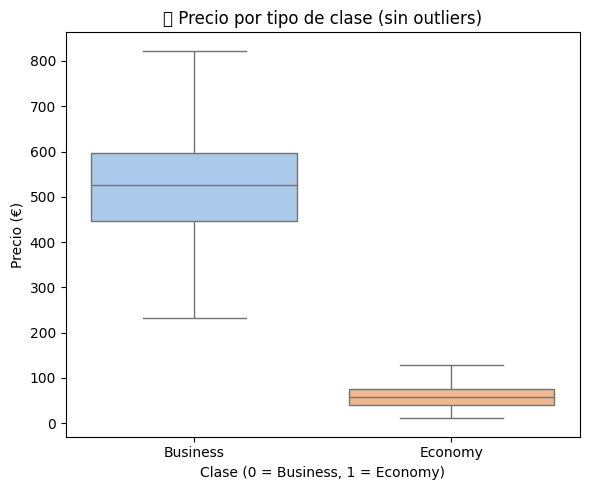

In [81]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='class_Economy', y='price_eur', showfliers=False, palette='pastel')
plt.title("💺 Precio por tipo de clase (sin outliers)")
plt.xlabel("Clase (0 = Business, 1 = Economy)")
plt.ylabel("Precio (€)")
plt.xticks([0, 1], ["Business", "Economy"])
plt.tight_layout()
plt.show()

C:\Users\Poltatil\AppData\Local\Temp\ipykernel_5392\661230702.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precio_duracion = df.groupby('duration_group')['price_eur'].mean().reset_index()
C:\Users\Poltatil\AppData\Local\Temp\ipykernel_5392\661230702.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=precio_duracion, x='duration_group', y='price_eur', palette='Blues_d')


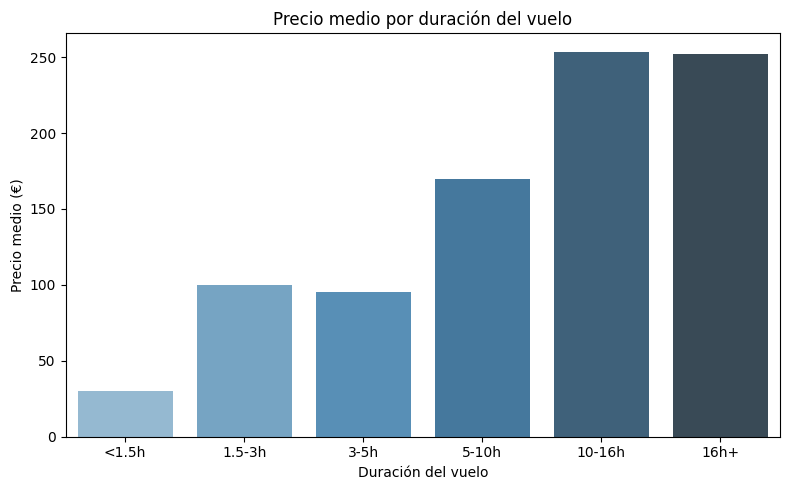

In [83]:
bins = [0, 90, 180, 300, 600, 1000, df['duration_mins'].max()]
labels = ['<1.5h', '1.5-3h', '3-5h', '5-10h', '10-16h', '16h+']
df['duration_group'] = pd.cut(df['duration_mins'], bins=bins, labels=labels, right=False)

# Calcular precio medio por rango de duración
precio_duracion = df.groupby('duration_group')['price_eur'].mean().reset_index()

# Gráfico de barras del precio medio por duración
plt.figure(figsize=(8, 5))
sns.barplot(data=precio_duracion, x='duration_group', y='price_eur', palette='Blues_d')
plt.title("Precio medio por duración del vuelo")
plt.xlabel("Duración del vuelo")
plt.ylabel("Precio medio (€)")
plt.tight_layout()
plt.show()

C:\Users\Poltatil\AppData\Local\Temp\ipykernel_5392\3462597993.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=precio_aerolinea_eco, x="price_eur", y="airline", palette="coolwarm")


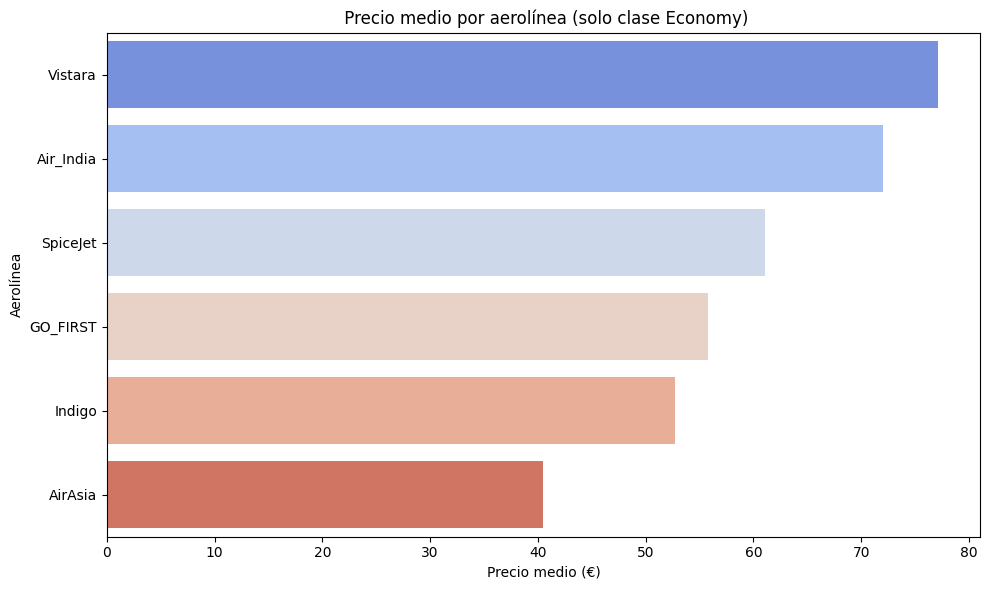

In [86]:
# Filtrar solo vuelos en clase Economy
df_economy = df[df["class_Economy"] == 1]

# Calcular precio medio por aerolínea
precio_aerolinea_eco = (
    df_economy.groupby("airline")["price_eur"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=precio_aerolinea_eco, x="price_eur", y="airline", palette="coolwarm")
plt.title(" Precio medio por aerolínea (solo clase Economy)")
plt.xlabel("Precio medio (€)")
plt.ylabel("Aerolínea")
plt.tight_layout()
plt.show()